In [1]:
from collections import Counter
import os
import re

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
matplotlib.rcParams['pdf.fonttype'] = 42

In [3]:
OUTPUT_DIR = '/gscmnt/gc2508/dinglab/estorrs/cptac3/temp'

In [4]:
mafs = {
    'pda': '/gscmnt/gc2508/dinglab/estorrs/cptac3/germline_calling_execution/pdac/hg38/execution/execution.maf',
    'gbm_bobo': '/gscmnt/gc2508/dinglab/estorrs/cptac3/germline_calling_execution/gbm/bobo_hg38/execution/execution.maf',
    'gbm': '/gscmnt/gc2508/dinglab/estorrs/cptac3/germline_calling_execution/gbm/hg38/execution/execution.maf',
    'ucec': '/gscmnt/gc2518/dinglab/cptac3/hg38/ucec/germline/germline.maf',
    'ov': '/gscmnt/gc2508/dinglab/estorrs/cptac3/data/temp/ov.prospective.maf',
    'brca': '/gscmnt/gc2508/dinglab/estorrs/cptac3/data/temp/brca.prospective.maf',
    'luad': '/gscmnt/gc2508/dinglab/estorrs/cptac3/data/temp/luad.maf',
    'ccrcc': '/gscmnt/gc2521/dinglab/cptac3/CCRC/hg38_alignment_call/germline/germline.maf'
}

In [5]:
cancer_type_to_samples = {k:[] for k in mafs.keys()}
for cancer_type, maf in mafs.items():
    print(cancer_type)
    f = open(maf)
    f.readline()

    for line in f:
        pieces = line.split('\t', 17)
        sample_id = pieces[16][:-2]
        cancer_type_to_samples[cancer_type].append(sample_id)

pda
gbm_bobo
gbm
ucec
ov
brca
luad
ccrcc


In [6]:
cancer_type_to_counter = {}
for cancer_type, ls in cancer_type_to_samples.items():
    cancer_type_to_counter[cancer_type] = Counter(ls)

In [7]:
# combine bobo and gbm
cancer_type_to_counter['gbm'].update(cancer_type_to_counter['gbm_bobo'])

In [8]:
len(cancer_type_to_counter['gbm'].most_common())

114

In [9]:
cancer_type_to_counter['luad'].most_common(5)

[('C3N-00738', 29064),
 ('C3N-00704', 24292),
 ('C3L-02365', 24093),
 ('C3L-00510', 24036),
 ('C3N-00223', 24029)]

In [10]:
d = {'sample id': [], 'cancer type': [], 'number of germline variants': []}
for cancer_type, counter in cancer_type_to_counter.items():
    if cancer_type != 'gbm_bobo':
        for sample_id, count in counter.most_common():
            d['sample id'].append(sample_id)
            d['cancer type'].append(cancer_type)
            d['number of germline variants'].append(count)
        
df = pd.DataFrame.from_dict(d)
df.head()

,sample id,cancer type,number of germline variants
0,C3L-01703,pda,24144
1,C3N-01998,pda,24043
2,C3L-01453,pda,23991
3,C3N-00249,pda,23980
4,C3N-01997,pda,23947


/gscmnt/gc2508/dinglab/estorrs/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


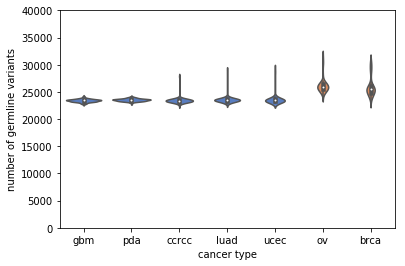

In [11]:
order = ['gbm', 'pda', 'ccrcc', 'luad', 'ucec', 'ov', 'brca']

colors = {p:'#4878D0' for p in order}

colors['ov'] = '#EE854A'
colors['brca'] = '#EE854A'


ax = sns.violinplot(x="cancer type", y="number of germline variants",
        data=df, order=order, palette=colors)

# plt.ylabel('number of germline variants', fontsize=16)
# plt.xlabel('cancer type', fontsize=16)

# plt.xticks(rotation=0, fontsize=12)
plt.ylim(0, 40000)

plt.savefig(os.path.join(OUTPUT_DIR, 'germline_counts.pdf'), dpi=300)
plt.savefig(os.path.join(OUTPUT_DIR, 'germline_counts.png'), dpi=300)